# Rajveer Sodhi

## Research Questions (Refined Post EDA):


#### 1. Out of all the data columns, which features seem to be the most crucial or most highly correlated with the breast cancer's diagnosis as benign or malignant, and can we define an approximate percentage probability of the breast cancer being benign or malignant based only on the values from these features (or their combinations)?

To analyse this, we can start by computing which features are the most recurrent with a type of cancer. The more times the feature is present (or of a certain value) in a certain type of cancer, the more important we may consider it to be. This could be achieved via scatter plots. After identifying these features, we can simply calculate how many cancer cases of a certain type out of the population correlate with this feature to find the probability of the given features to indicate a chance for a benign or malignant cancer.

#### 2. Are there certain subsets of features that seem to be internally correlated? By extension, can we predict the values of other features in this subset given the value of just one?

To answer this question, we can create layered bar graphs and heat maps to notice any patterns in the values and try to find a correlation coefficient for them. That way, we could potentially link all characteristics in the subset together. Heat maps can offer a healpful insight into high correlations, as done in the EDA below. However, these relationships need to be further explored and mathematically formulated to answer the above question and potentially make predictions.

## Loading the Dataset:



In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# importing dataset
dataset = pd.read_csv("../data/raw/data.csv")

## Exploratory Data Analysis (EDA)

First, let's find out basic information about our dataset to begin.

In [ ]:

print("The shape (rows, columns) of the dataset is: ", dataset.shape)

The shape (rows, columns) of the dataset is:  (569, 33)


In [ ]:
print("The columns in the dataset are:")
dataset.columns

The columns in the dataset are:


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
print("The first 5 rows (or head) of the dataset is: ")
dataset.head()

The first 5 rows (or head) of the dataset is: 


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
print("Information about values in the dataset is:")
dataset.info()

Information about values in the dataset is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-nul

In [ ]:
print("Description of dataset:")
dataset.describe(exclude = np.number)

Description of dataset:


,diagnosis
count,569
unique,2
top,B
freq,357


Now, we can clean up and then analyze the dataset to find relevant information.

In [ ]:
print("Firstly, we will remove the unused columns 'Unnamed: 32' and 'id':")
data = dataset.drop(['id','Unnamed: 32'], axis=1)
data

Firstly, we will remove the unused columns 'Unnamed: 32' and 'id':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
print("Let's see the full description of the dataset now:")
data.describe()

Let's see the full description of the dataset now:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
print("Let's view the possible values of the final diagnosis of breast cancers in the dataset. We can then explore the breakdown of these values in the dataset and move on to correlating these values with other columns.")
data.diagnosis.unique()
print()
print("Here, 'M' stands for 'Malignant' and 'B' stands for 'Benign'.")

Let's view the possible values of the final diagnosis of breast cancers in the dataset. We can then explore the breakdown of these values in the dataset and move on to correlating these values with other columns.

Here, 'M' stands for 'Malignant' and 'B' stands for 'Benign'.


Number of malignant cases: 212
Number of benign cases: 357

Here is a useful visualization of this breakdown:
As visible, the number of benign cases are 1.6839622641509433 times the number of malignant cases.


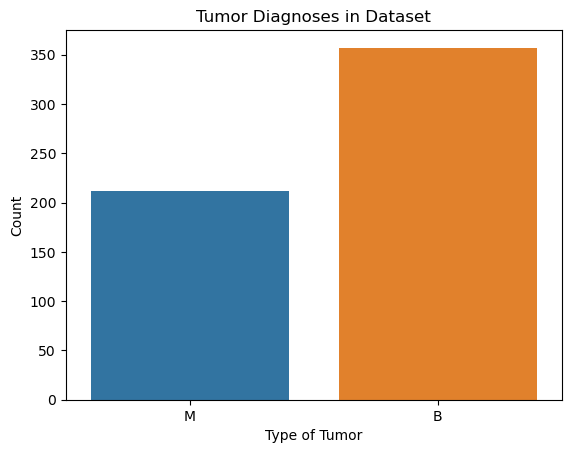

In [ ]:
m = data['diagnosis'].value_counts()['M']
b = data['diagnosis'].value_counts()['B']
print("Number of malignant cases:", m)
print("Number of benign cases:", b)
print()
print("Here is a useful visualization of this breakdown:")
diag = sns.countplot(data = data, x = 'diagnosis').set(title = "Tumor Diagnoses in Dataset", xlabel = "Type of Tumor", ylabel = "Count")
print("As visible, the number of benign cases are", b/m, "times the number of malignant cases.")

Now, let's try to explore the relationship between the values in the dataset.
The following is a heatmap of all numerical values in the dataset:


Text(0.5, 1.0, 'Heatmap of Dataset')

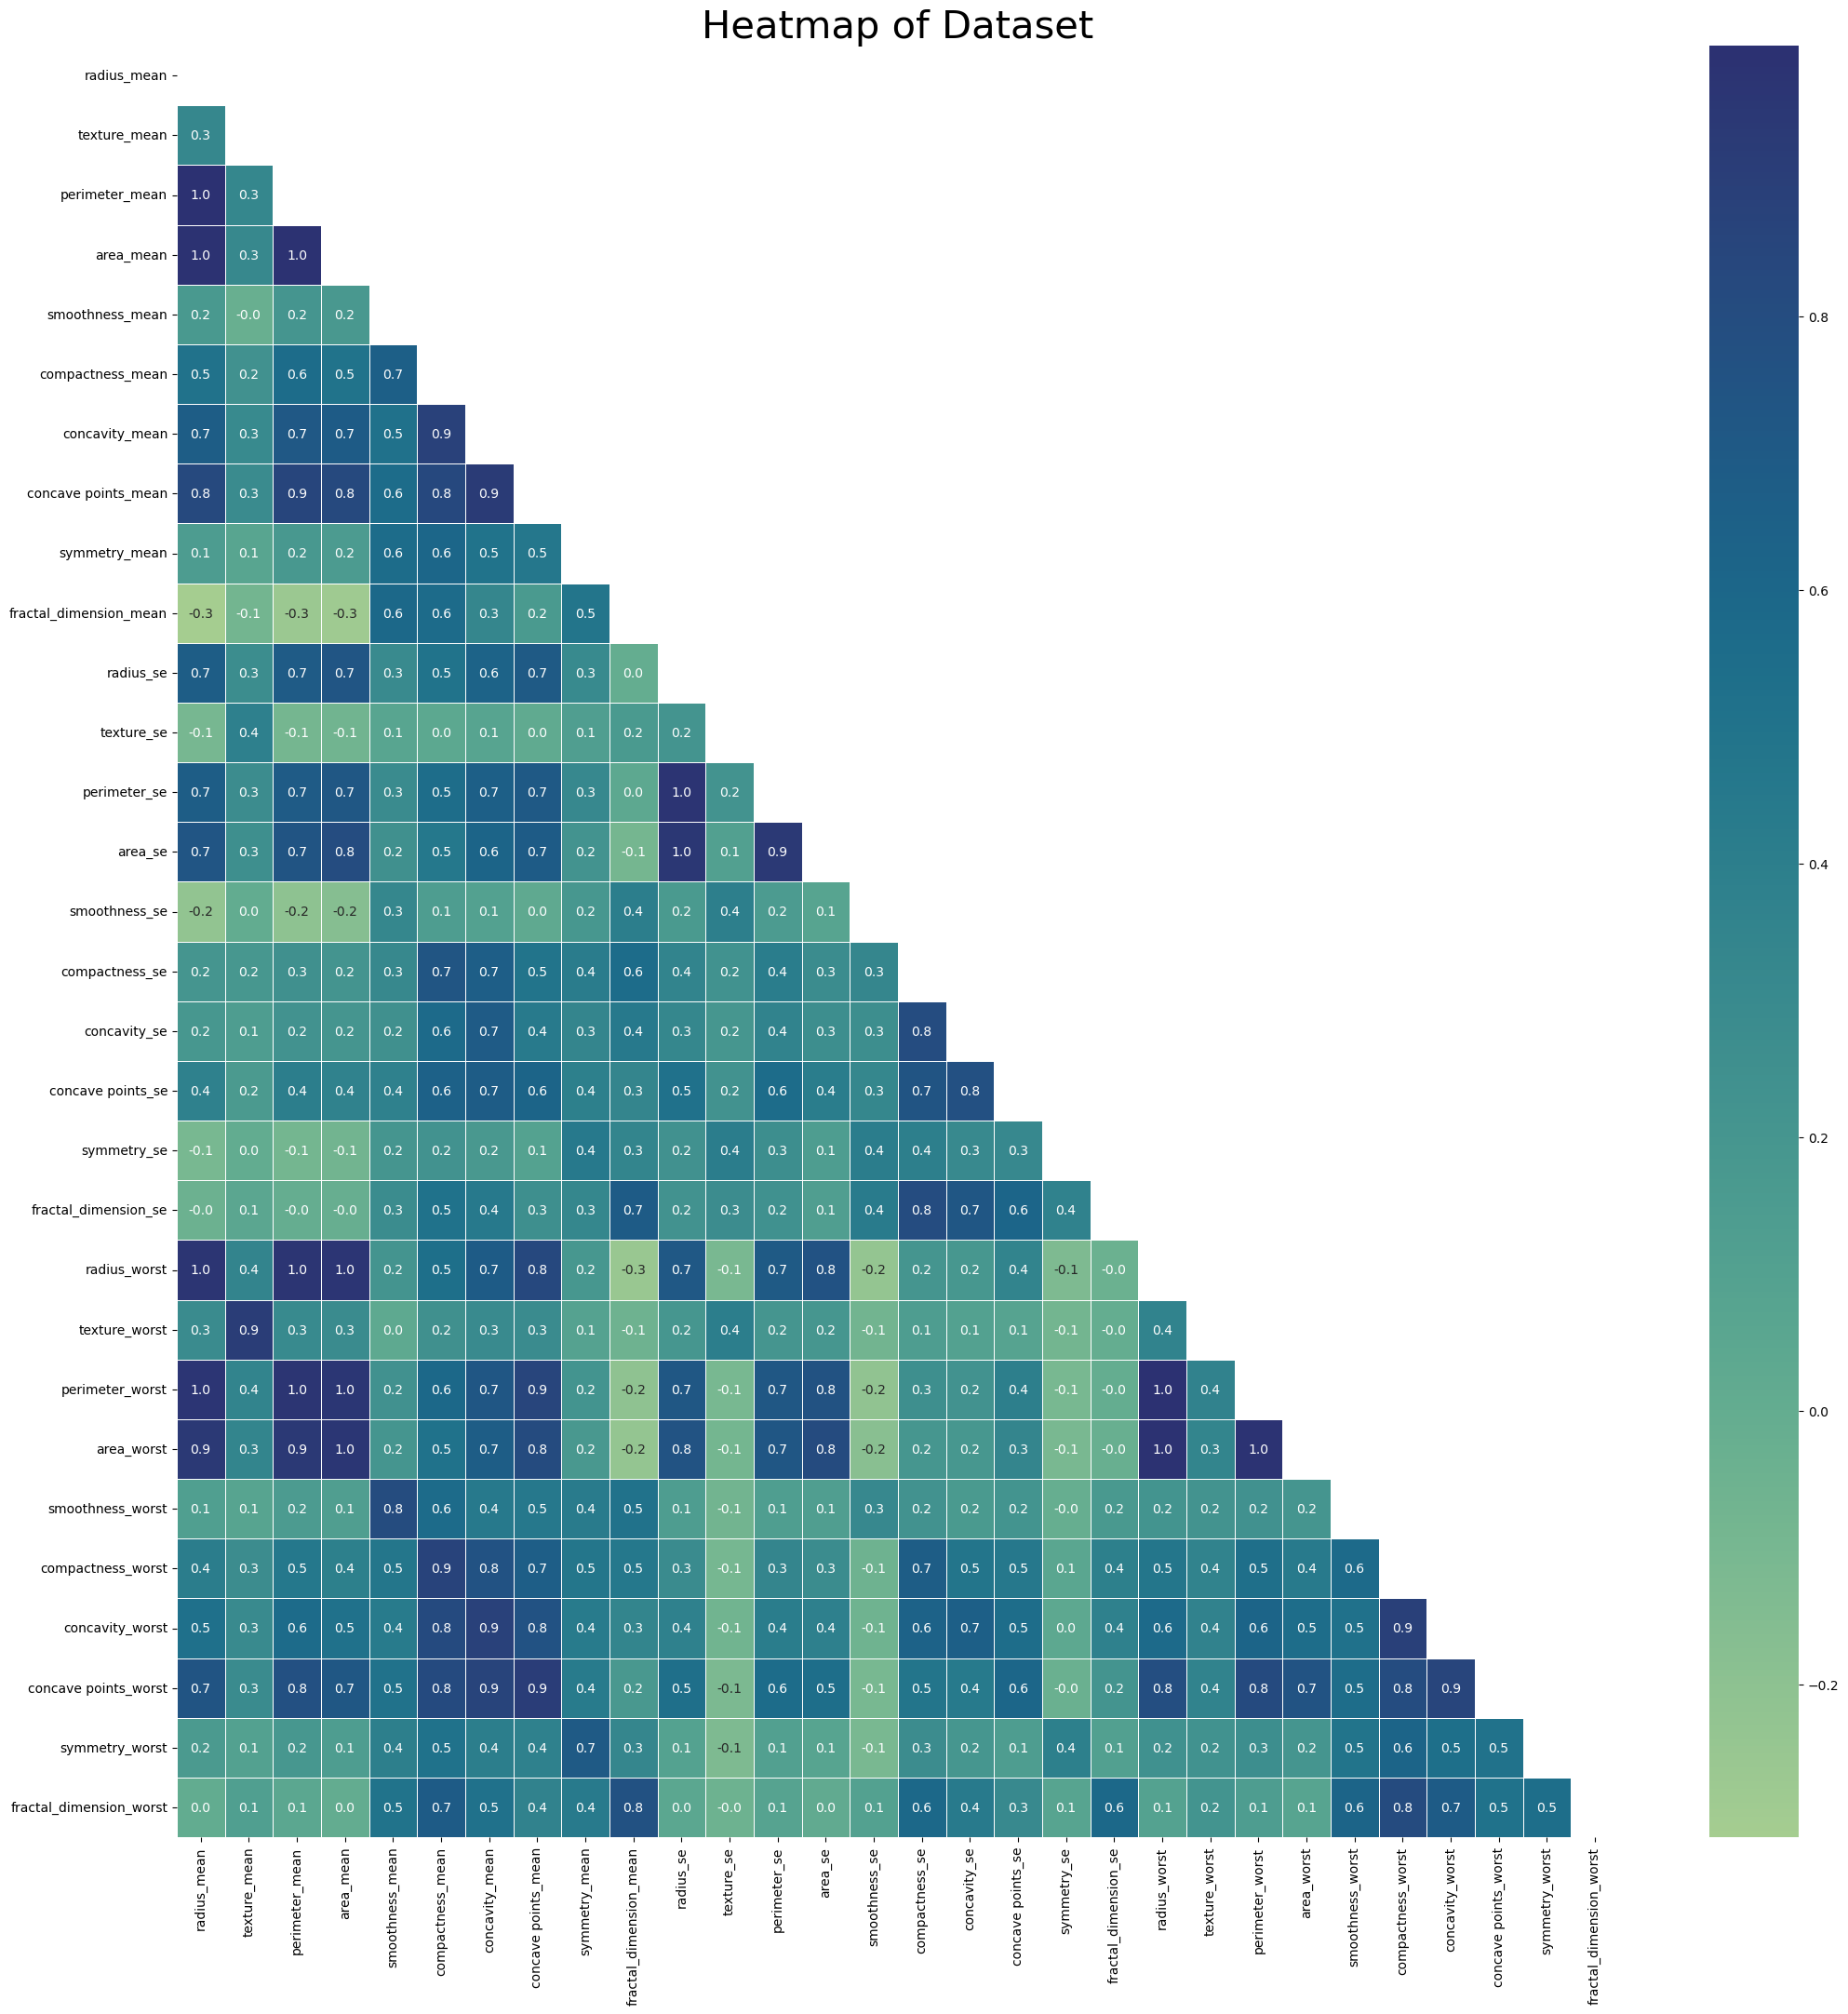

In [ ]:
print("Now, let's try to explore the relationship between the values in the dataset.")
print("The following is a heatmap of all numerical values in the dataset:")

num_d = data.corr(numeric_only = True)
plt.figure(figsize=(25, 25))
matrix = np.triu(num_d)
heat = sns.heatmap(data = num_d, annot = True, fmt = ".1f", linewidth = 0.5, cmap = "crest", mask = matrix)
plt.title("Heatmap of Dataset", size = 30)

We can also filter this heatmap as so to only view high correlation values:


Text(0.5, 1.0, 'Heatmap of Dataset (Filtered; >=0.85)')

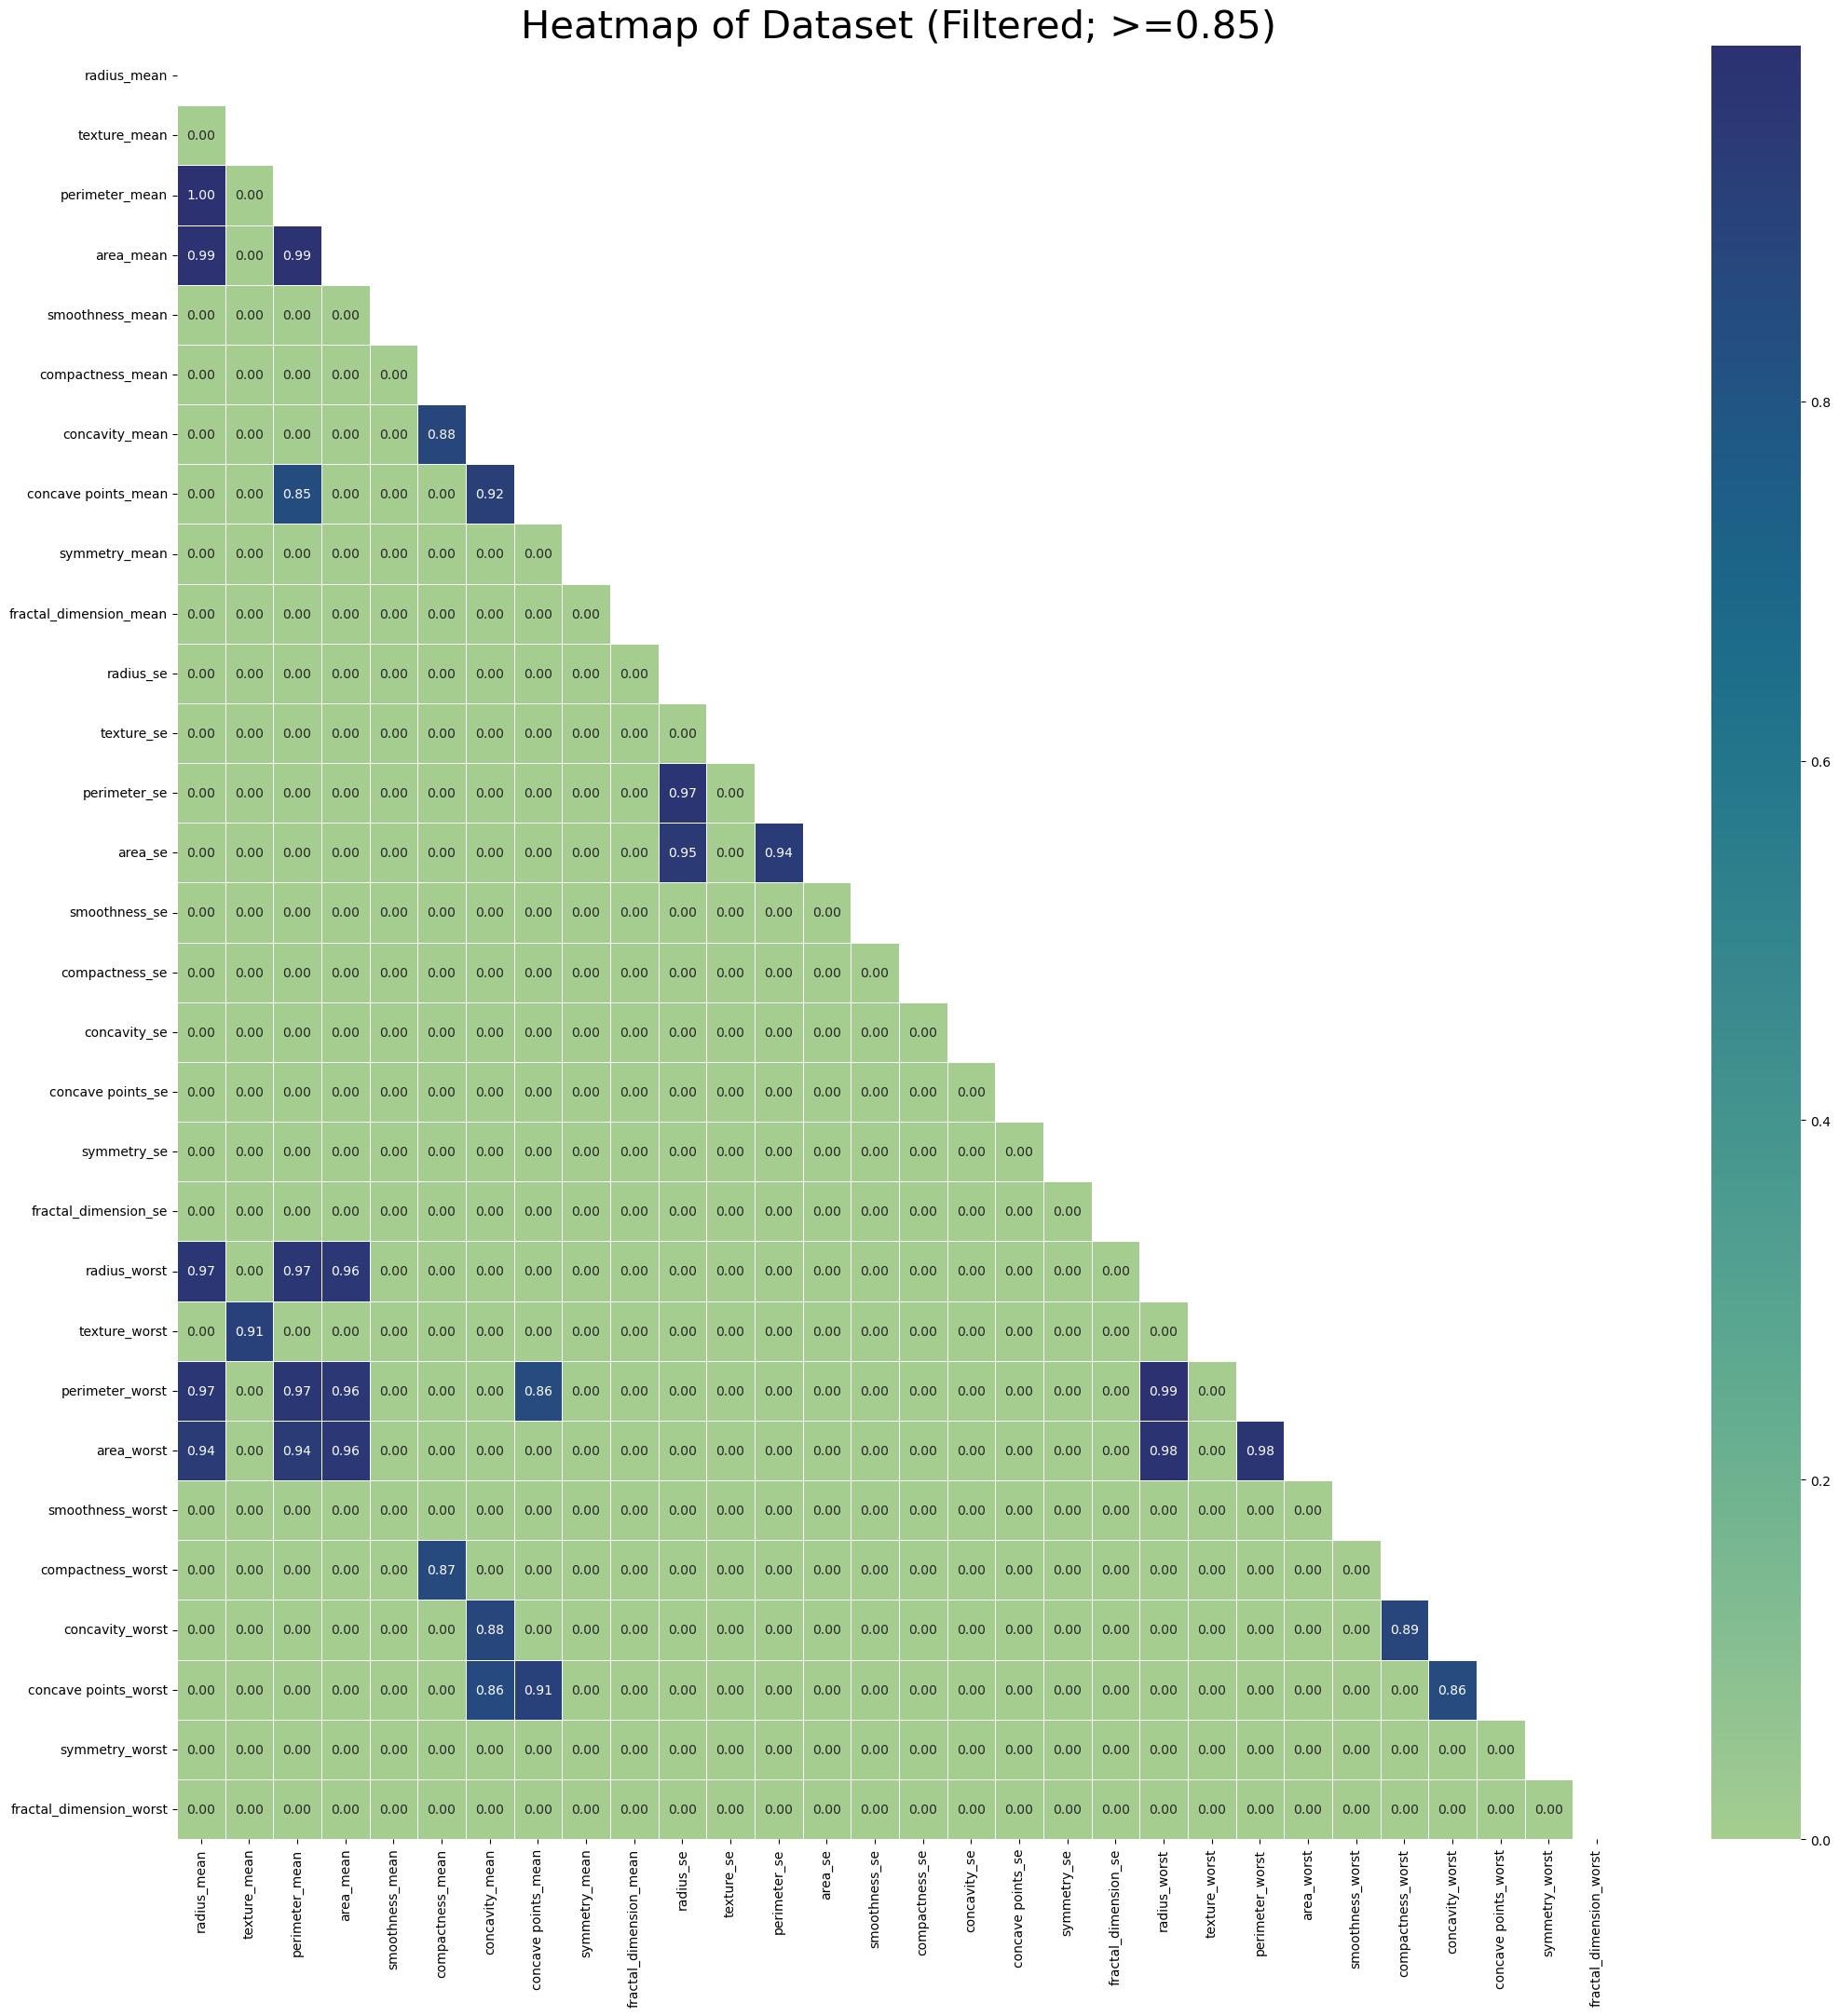

In [ ]:
print("We can also filter this heatmap as so to only view high correlation values:")
filtered = num_d
filtered[abs(filtered) < 0.85] = 0
plt.figure(figsize=(25, 25))
heat = sns.heatmap(data = filtered, annot = True, fmt = ".2f", linewidth = 0.5, cmap = "crest", mask = matrix)
plt.title("Heatmap of Dataset (Filtered; >=0.85)", size = 30)

From the above filtered heatmap, we can clearly notice that the following (not including different aspects of same value such as compactness_worst and compactness_mean) values are highly correlated. That is, the changes in value A closely imply similar changes in value B:

- *concave_points_worst* and *convacity_mean*
- *concave_points_worst* and *concavity_worst*
- *convacity_worst* and *compactness_worst*
- *area_worst* and *radius_mean*
- *area_worst* and *perimeter_mean*
- *area_worst* and *radius_worst*
- *area_worst* and *perimeter_worst*
- *permieter_worst* and *radius_mean*
- *perimeter_worst* and *area_mean*
- *permieter_worst* and *concave_points_mean*
- *perimeter_worst* and *radius_worst*
- *radius_worst* and *perimeter_mean*
- *radius_worst* and *area_mean*
- *area_se* and *radius_se*
- *area_se* and *perimeter_se*
- *perimeter_se* and *radius_se*
- *concave_points_mean* and *perimeter_mean*
- *concave_points_mean* and *concavity_mean*
- *concavity_mean* and *compactness_mean*
- *area_mean* and *radius_mean*
- *area_mean* and *perimeter_mean*
- *perimeter_mean* and *radius_mean*

Furthermore, we can analyze the differences in values such as radius_mean, perimeter_mean, and area_mean between the two types of cancers for a clearer picture of correlations:

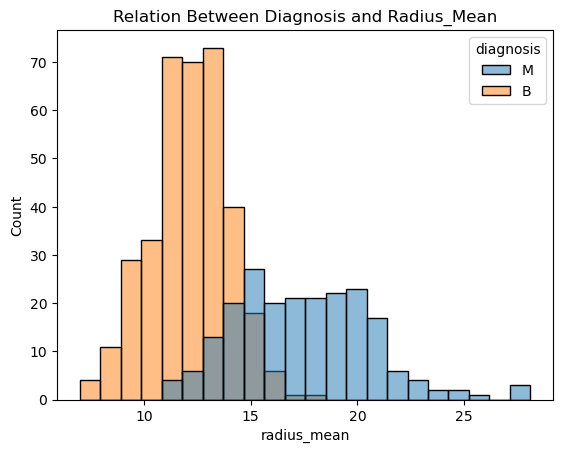

In [ ]:
hist1 = sns.histplot(data = data, x = "radius_mean", hue = "diagnosis").set(title = "Relation Between Diagnosis and Radius_Mean")

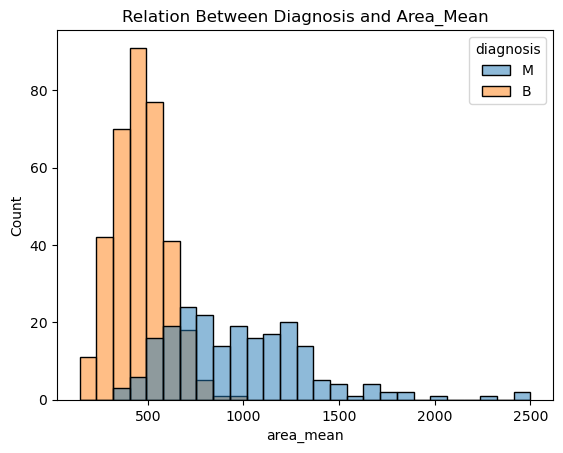

In [ ]:
hist4 = sns.histplot(data = data, x = "area_mean", hue = "diagnosis").set(title = "Relation Between Diagnosis and Area_Mean")

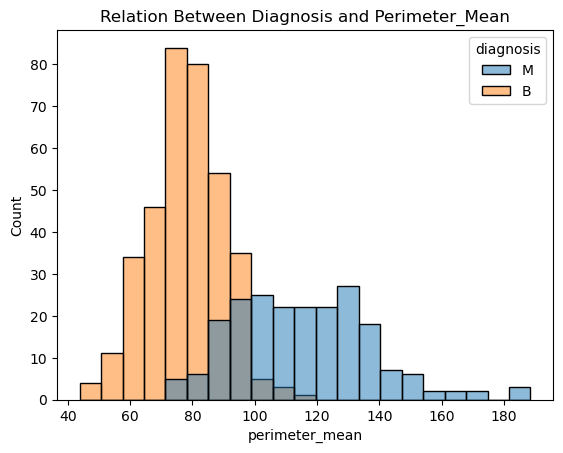

In [ ]:
hist5 = sns.histplot(data = data, x = "perimeter_mean", hue = "diagnosis").set(title = "Relation Between Diagnosis and Perimeter_Mean")

The above histographs clearly illustrate that benign cancer diagnoses have a higher area_mean, radius_mean, and perimeter_mean than malignant diagnoses of cancer.

Additionally, it is also important to note that in all the graphs, the values for malignant diagnoses of cancer are all **positively skewed**.

Let us now explore the relationship of a particular diagnoses with other variables.
Using a violin plot, we can compare values of the texture_mean of the two types of tumors.


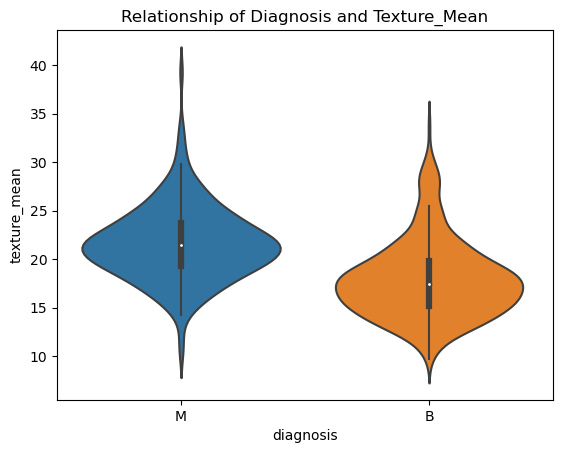

In [ ]:
violin = sns.violinplot(data = data, x = "diagnosis", y = "texture_mean").set(title = "Relationship of Diagnosis and Texture_Mean")

As visible above, the mean value of the textures in malignant cases is slightly higher than that in benign cases, with a majority of them clustered around a value of approximately 22 whereas the texture_mean of benign cases is mostly clustered around (approx) 17.

Next, we can also use a jointplot to analyze the relation between the concavity_mean values and the diagnoses.

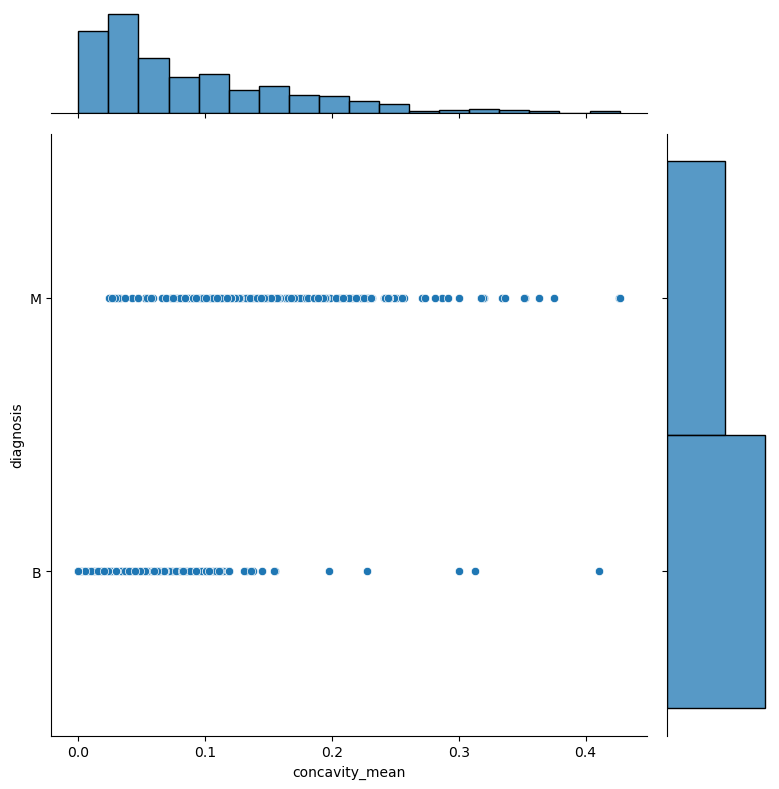

In [ ]:
joint = sns.jointplot(data = data, x = "concavity_mean", y = "diagnosis", height=8)

We can observe in the above graph:
- The data is positively skewed.
- There are more benign case observations than malignant.
- Benign cases mostly have a low value of concavity_mean whereas malignant cases also have a significant population of higher values.

#### From this superficial analysis, we can tell that there are certain and observable differences in the various aspects of a breast cancer detection based on whether it is diagnosed to be a benign tumor or malignant one.